[[1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]]
T_queue:  15 Total reward: 1
[ 2.  5.  8. 11. 13. 15. 15. 15. 15. 17. 16. 22. 23. 25. 30. 27. 30. 32.
 33. 34. 37. 40. 42. 44.  0.  0.]
24


'\nfig, ax = plt.subplots(subplot_kw={"projection": "3d"})\nfig.set_size_inches(8, 8)\nsurf = ax.plot_surface(Result, Result, Result, cmap=cm.coolwarm, linewidth=0, antialiased=False)\nfig.colorbar(surf, shrink=0.5, aspect=5)\nax.set_xlabel(\'State\')\nax.set_ylabel(\'Action\')\nax.set_zlabel(\'Reward\')\nax.set_title(\'3D contour\')\nplt.show()\n'

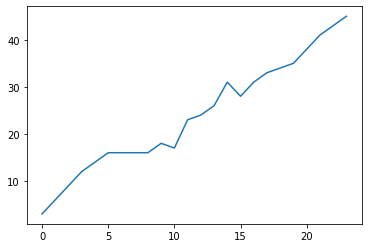

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


end_point = 16
Q = np.zeros([end_point,3]) # state = 000, action = 3
num_episodes = 5000
temp_reward = np.zeros([end_point+10])
temp_action = np.zeros([end_point+10])
temp_state = np.zeros([end_point+10])
temp_stack = np.zeros([end_point+10])

def rargmax(vector):
  m = np.amax(vector)
  indices = np.nonzero(vector == m)[0]
  return random.choice(indices) # 선택지가 모두 0이면, 랜덤으로 고름

def RL_filter(state, action, T_queue): # 강화학습이 동작해야 할 판

  '''
  ###### Queue stack over
  if T_queue >= end_point*20:
    action = 0
  elif T_queue >= end_point*17:
    action = 1
  elif T_queue >= end_point*15:
    action = 2
  else:
    action = 3
  '''

  ###### Computation: State 
  if action == 0: # Filter size: 3
    new_state = state + 1
    stack = 1

  elif action == 1: # Filter size: 5
    new_state = state + 2
    stack = 2

  else: # Filter size: 7
    new_state = state + 3
    stack = 3

#  else:             # Filter size: 9
#    new_state = state + 3
#    stack = 60

  ###### Computation: Reward
  if new_state == 15:
    reward = 1
  elif (new_state == 3) or (new_state == 4) or (new_state == 7) or (new_state == 9) or (new_state == 14):
    new_state = state
    reward = -1
  else:
    reward = 0


  ###### Computation: Done
  if new_state >= end_point-1:
    new_state = end_point-1
    done = True
  else:
    done = None

  return new_state, reward, done, action, stack


for i in range(num_episodes):
  p = 0
  e = 1./((i/100)+1) # decaying e-greedy = 0.99->0.98->0.97->0.96-> ...->0.0009 (10000)
  state = 0
  T_queue = 0
  total_reward = 0
  done = None
  gamma = 1   # 미래의 reward가 현재의 reward보다 낮다.

  while not done:
    if np.random.rand(1) < e:
      action = random.choice(range(0,3))
    else:
      action = rargmax(Q[state, :])
    new_state, reward, done, act, stack = RL_filter(state, action, T_queue)
    Q[state, action] = reward + gamma * np.max(Q[new_state, :])   # Q(s,a) = r + gamma*argmax Q(s', a')  (0 < gamma <= 1)

    total_reward += reward
    state = new_state
    T_queue += stack
    temp_reward[p] = total_reward
    temp_action[p] = act
    temp_state[p] = new_state
    temp_stack[p] = T_queue
    p += 1

print(np.transpose(Q))
print('T_queue: ', T_queue, 'Total reward:', total_reward)
print(temp_stack)
print(np.count_nonzero(temp_stack))
#print(temp_reward, temp_action, temp_state)

#X = np.linspace(0,end_point-1, end_point)

#plt.plot(Q)
#plt.plot(Result[:,0])  # Reward
#plt.plot(temp_action)   # Action
#plt.plot(Result[:,2])  # State
plt.plot(temp_stack[0:np.count_nonzero(temp_stack)]+1)   # Stack


"""
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(8, 8)
surf = ax.plot_surface(Result, Result, Result, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('State')
ax.set_ylabel('Action')
ax.set_zlabel('Reward')
ax.set_title('3D contour')
plt.show()
"""
